In [42]:
# Import matplotlib and setup the figures to display within the notebook
# %matplotlib inline # - no longer needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

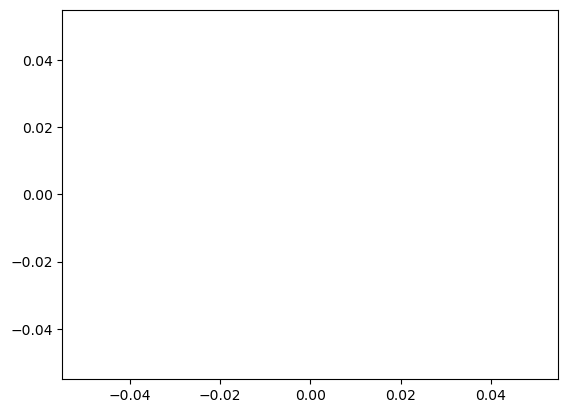

In [43]:
# With the semi-colon
plt.plot();

# You could use plt.show() if you want
# plt.plot()
# plt.show()

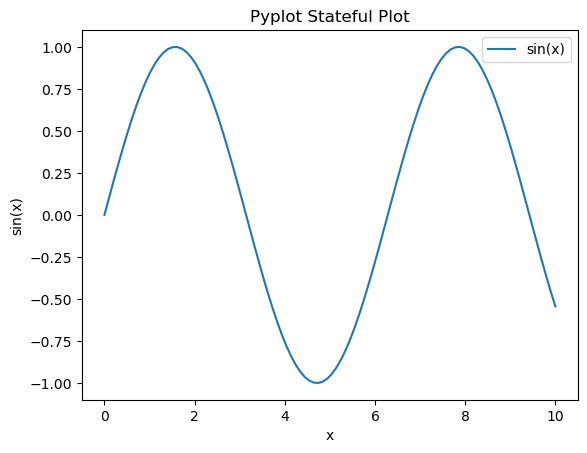

In [44]:
# First method - pyplot API
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, label='sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Pyplot Stateful Plot')
plt.legend()
plt.show()

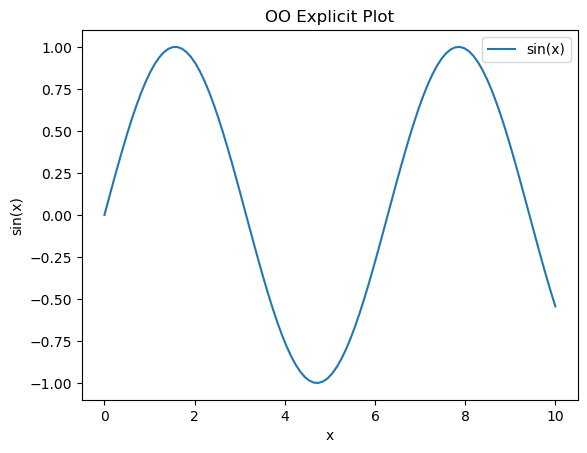

In [45]:
# Second method: Object-oriented API - recommended method!
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label='sin(x)')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.set_title('OO Explicit Plot')
ax.legend()
plt.show()

In [46]:
# This is where the object orientated name comes from 
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

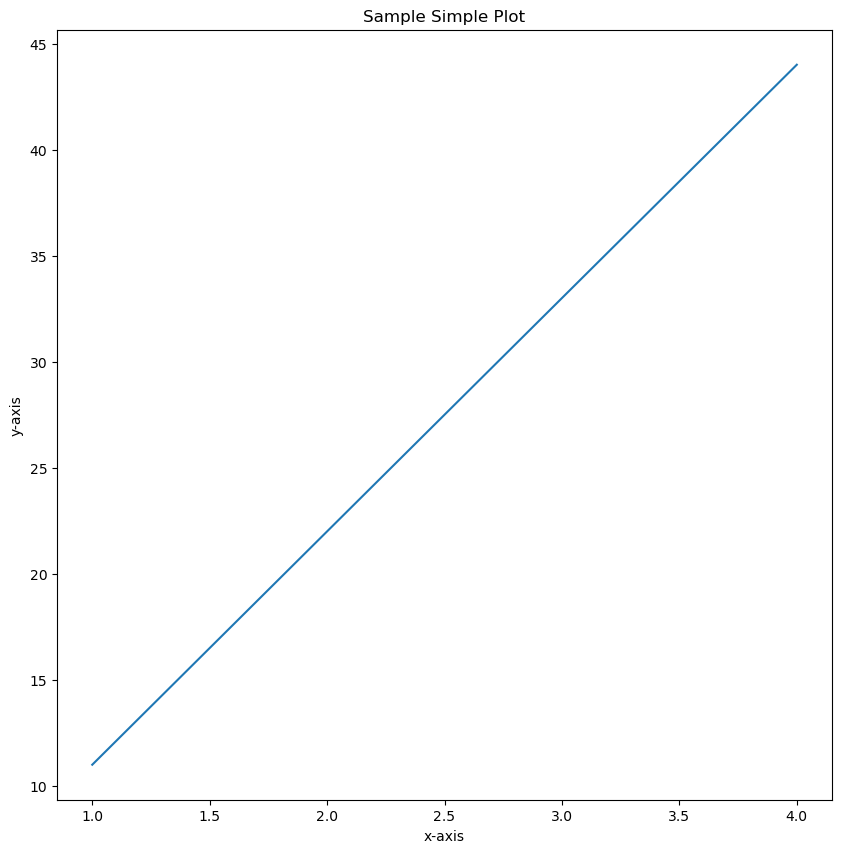

In [47]:
# A matplotlib workflow

# 0. Import and get matplotlib ready
# %matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("./images/simple-plot.png")

## Making the most common type of plots using NumPy arrays

In [48]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

### Line

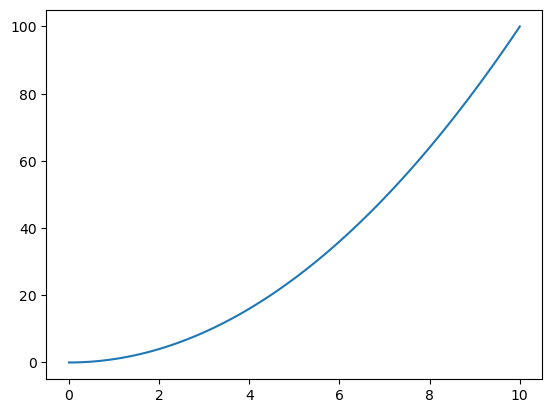

In [49]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);

### Scatter

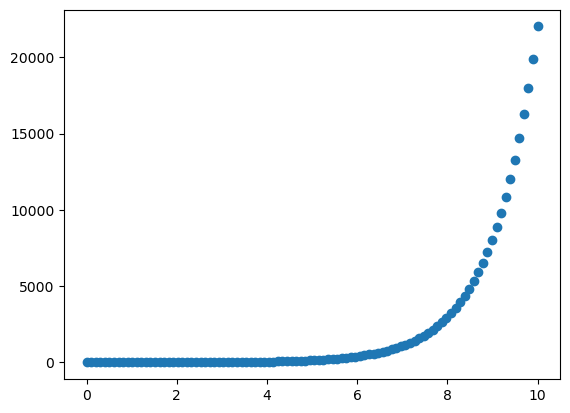

In [50]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

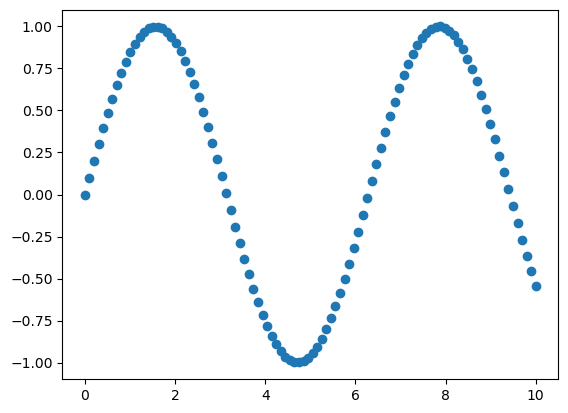

In [51]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

### Bar

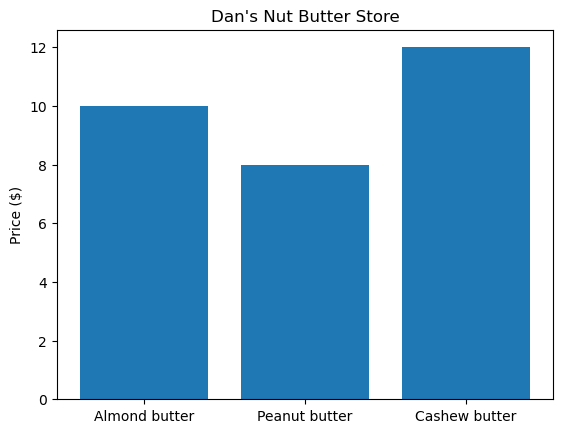

In [52]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

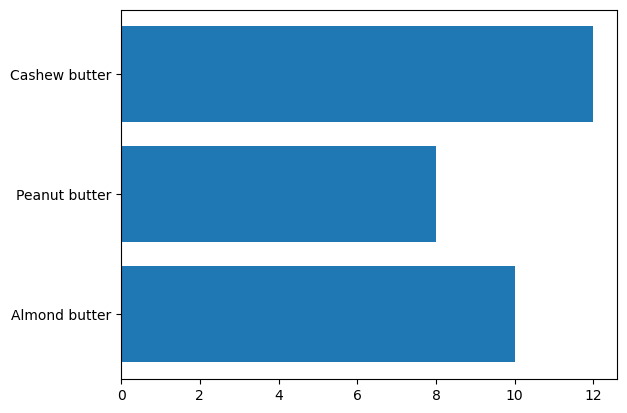

In [53]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

### Histogram (hist)

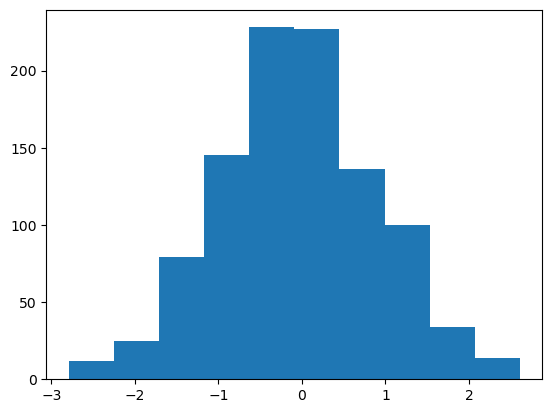

In [54]:
# Make some data from a normal distribution
x = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

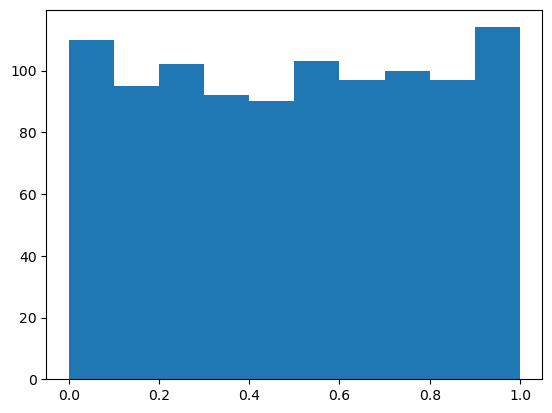

In [55]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);

### Subplots

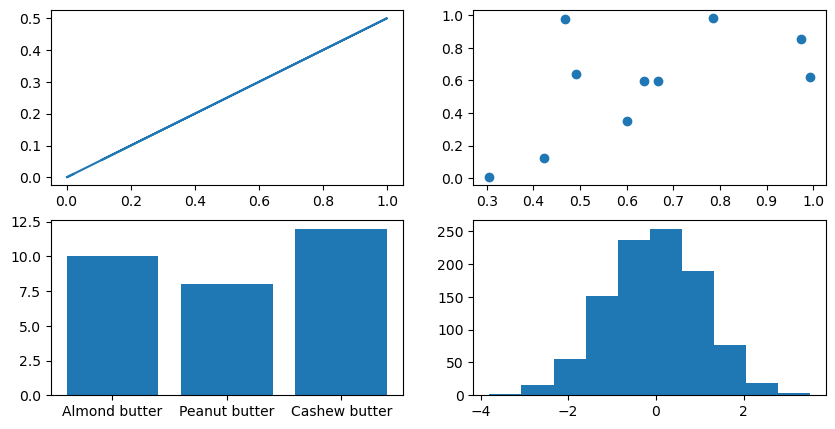

In [56]:
# Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

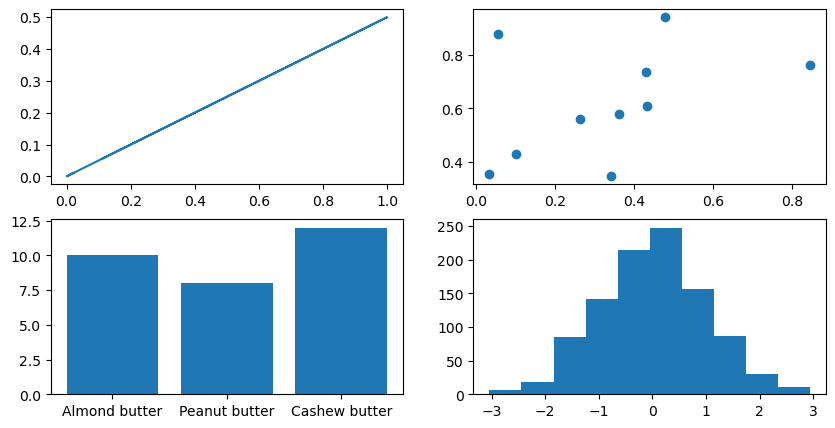

In [57]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting data directly with pandas

In [85]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("./car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [86]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01   -0.716326
2020-01-02   -0.417429
2020-01-03    1.238353
2020-01-04    0.396368
2020-01-05    1.484383
                ...   
2022-09-22    0.208328
2022-09-23   -1.521453
2022-09-24    1.875111
2022-09-25   -0.357156
2022-09-26   -1.254545
Freq: D, Length: 1000, dtype: float64

In [87]:
ts.cumsum()

2020-01-01    -0.716326
2020-01-02    -1.133755
2020-01-03     0.104598
2020-01-04     0.500966
2020-01-05     1.985348
                ...    
2022-09-22   -55.730066
2022-09-23   -57.251519
2022-09-24   -55.376408
2022-09-25   -55.733565
2022-09-26   -56.988110
Freq: D, Length: 1000, dtype: float64

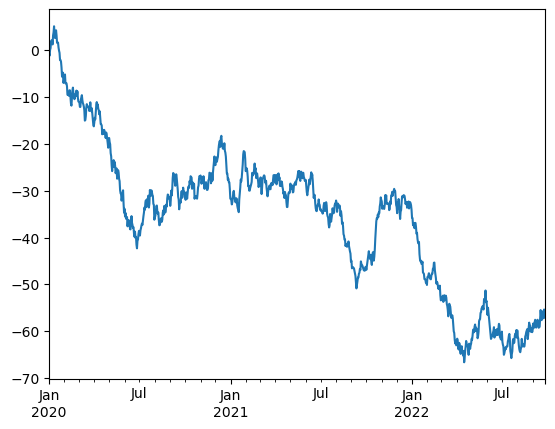

In [89]:
ts.cumsum().plot();

### Working with actual data

In [94]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace(r'[^\d,.]', '', regex=True)
car_sales["Price"] = car_sales["Price"].str.replace(',', '', regex=False)
car_sales["Price"] = pd.to_numeric(car_sales["Price"]).astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [95]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [98]:
# Make total sales column (doesn't work, adds as string)
#car_sales["Total Sales"] = car_sales["Price"].cumsum()

# Oops... want them as int's not string
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


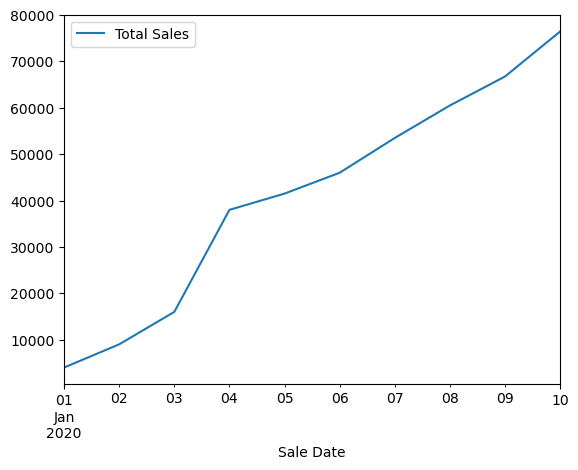

In [102]:
car_sales.plot(x='Sale Date', y='Total Sales');

### Scatter

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

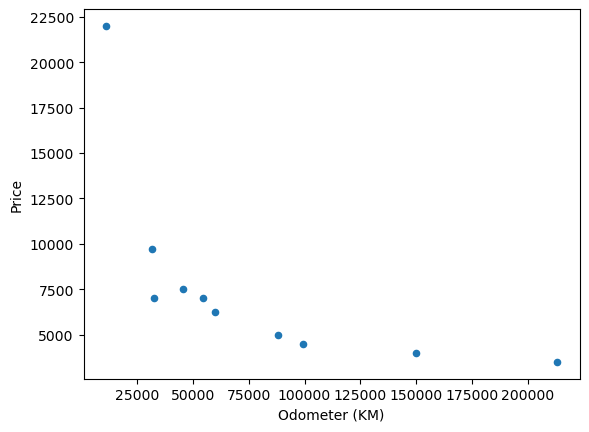

In [100]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

### Bar

In [103]:
x = np.random.rand(10, 4)
x

array([[0.16159501, 0.43014058, 0.21675846, 0.61765526],
       [0.93972924, 0.12019784, 0.31903608, 0.79699174],
       [0.10503106, 0.44859701, 0.48664025, 0.89144731],
       [0.08238041, 0.98025584, 0.25685415, 0.72263798],
       [0.76343772, 0.26852957, 0.24381038, 0.55918841],
       [0.97699225, 0.32791358, 0.58717918, 0.13028306],
       [0.25403367, 0.62188183, 0.11430255, 0.01522389],
       [0.30902548, 0.02918879, 0.54290914, 0.45677635],
       [0.44577448, 0.80161555, 0.39061254, 0.91342139],
       [0.3023318 , 0.55286229, 0.81886641, 0.52133657]])

In [104]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.161595,0.430141,0.216758,0.617655
1,0.939729,0.120198,0.319036,0.796992
2,0.105031,0.448597,0.486640,0.891447
3,0.082380,0.980256,0.256854,0.722638
4,0.763438,0.268530,0.243810,0.559188
5,0.976992,0.327914,0.587179,0.130283
6,0.254034,0.621882,0.114303,0.015224
7,0.309025,0.029189,0.542909,0.456776
8,0.445774,0.801616,0.390613,0.913421
9,0.302332,0.552862,0.818866,0.521337


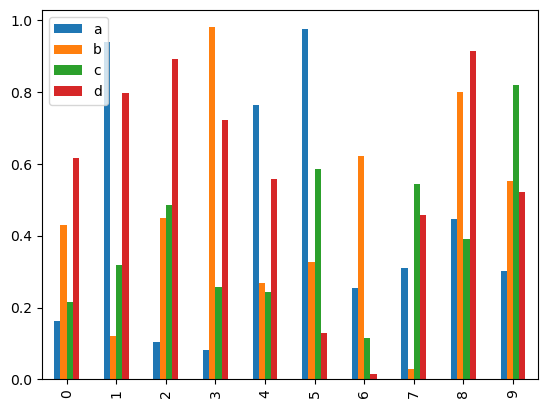

In [105]:
df.plot.bar();

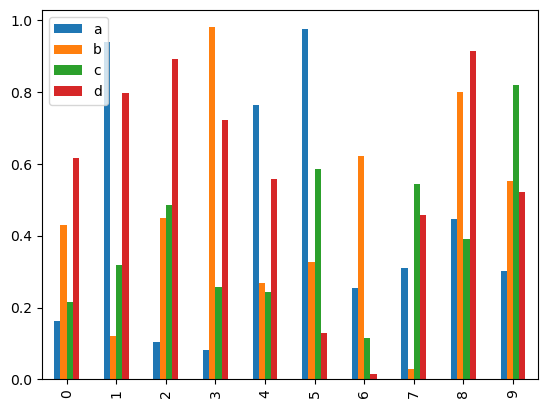

In [106]:
# Can do the same thing with 'kind' keyword
df.plot(kind='bar');

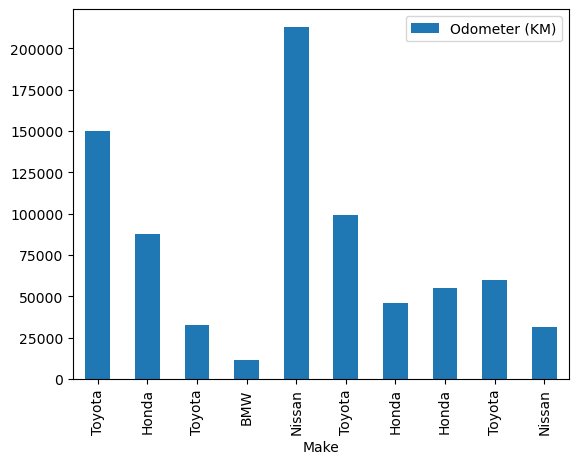

In [107]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

### Histograms

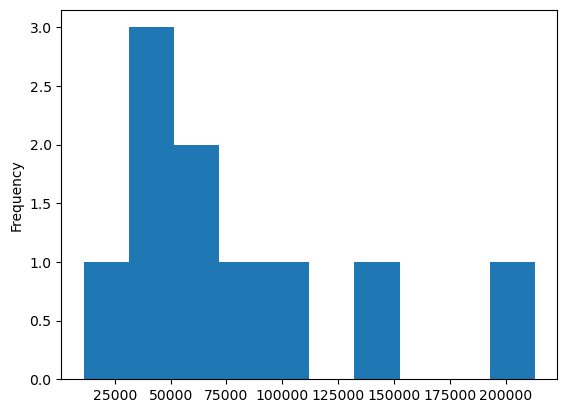

In [108]:
car_sales["Odometer (KM)"].plot.hist();

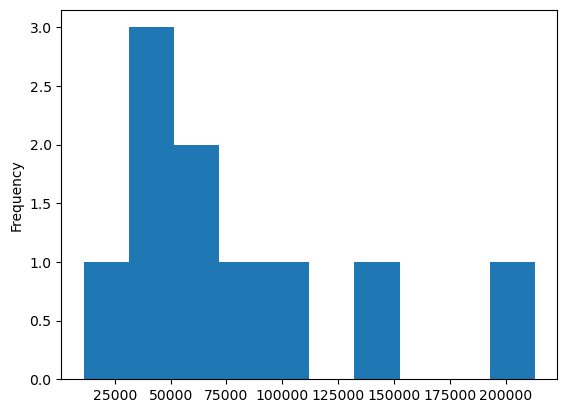

In [109]:
car_sales["Odometer (KM)"].plot(kind="hist");

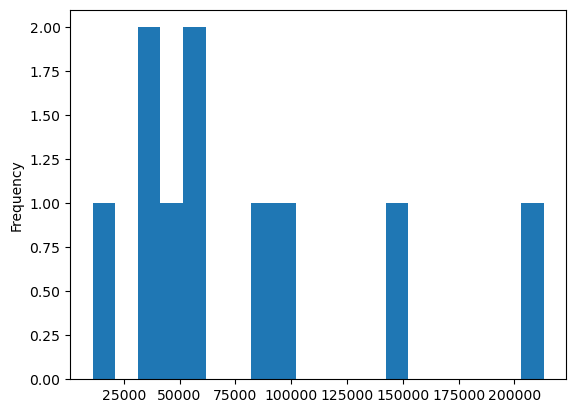

In [110]:
# Default number of bins is 10 
car_sales["Odometer (KM)"].plot.hist(bins=20);

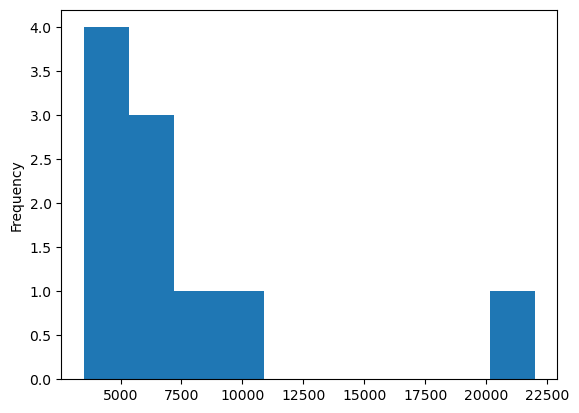

In [111]:
car_sales["Price"].plot.hist(bins=10);